# Taylor Series

The study of **Taylor series** is largely about taking non-polynomial functions and finding **polynomials** that approximate them near some point. Polynomials tend to be much easier to deal with than other functions, as they are easier to compute, easier to take derivatives and easier to integrate.

The goal is to construct a quadratic approximation at some point. It should look like this:

$$ P (x) = c_0 + c_1x + c_2x^2 + \cdots $$ 

$ c_0, c_1, c_2, c_3$, etc. are constants that can be changed.
The first part of this polynomial gets a match of the output of the original function at some point. The second part, the first derivative, gets the same slope as the original function. The third part, the second derivative, gets a curve at the same rate With each added part, the approximation becomes more precise..



_**Note**: The text above quotes 3Blue1Brown._

The Taylor series expansion for the sine function around \( x = 0 \) is given by:
$$ \sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} $$

This can be written out explicitly as:
$$ \sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!} - \cdots $$

The Taylor series expansion for the cosine function around \( x = 0 \) is given by:
$$ \cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!} x^{2n} $$

This can be written out explicitly as:
$$ 
\cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!} -\cdots $$

The code below visualizes how the Taylor series approximations of the sine and cosine functions become more accurate as more terms are included. The actual functions are also plotted for comparison.

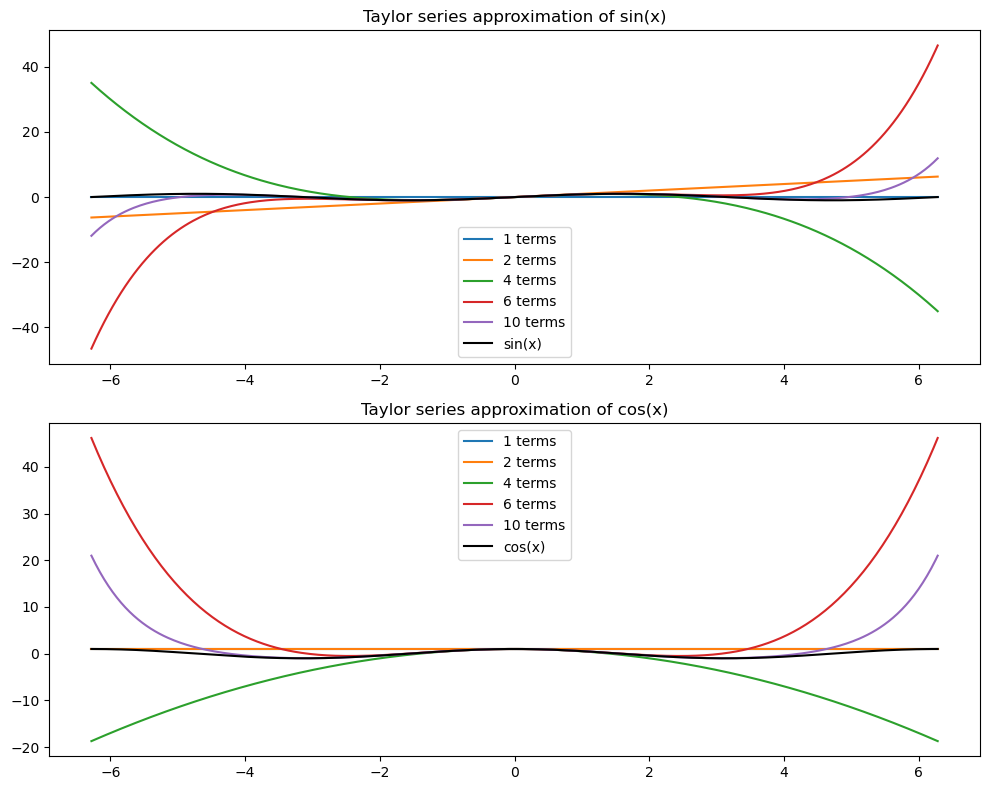

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def taylor_sine_sympy(x_value, n_terms=10):
    x_sym = sp.symbols('x')
    sine_series = sp.series(sp.sin(x_sym), x_sym, 0, n_terms).removeO()
    sine_approx = sine_series.subs(x_sym, x_value)
    return sine_approx.evalf()

def taylor_cosine_sympy(x_value, n_terms=10):
    x_sym = sp.symbols('x')
    cosine_series = sp.series(sp.cos(x_sym), x_sym, 0, n_terms).removeO()
    cosine_approx = cosine_series.subs(x_sym, x_value)
    return cosine_approx.evalf()


# Define the range of x values (from -2π to 2π)
x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 400)
x_vals_sympy = [sp.Float(x) for x in x_vals]

# Number of terms to test
terms_list = [1, 2, 4, 6, 10]

# Initialize plots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot sine approximations
for n_terms in terms_list:
    sine_approx_vals = [taylor_sine_sympy(x, n_terms) for x in x_vals_sympy]
    ax[0].plot(x_vals, sine_approx_vals, label=f'{n_terms} terms')

# Plot the actual sine function
ax[0].plot(x_vals, np.sin(x_vals), 'k-', label='sin(x)')
ax[0].set_title('Taylor series approximation of sin(x)')
ax[0].legend()

# Plot cosine approximations
for n_terms in terms_list:
    cosine_approx_vals = [taylor_cosine_sympy(x, n_terms) for x in x_vals_sympy]
    ax[1].plot(x_vals, cosine_approx_vals, label=f'{n_terms} terms')

# Plot the actual cosine function
ax[1].plot(x_vals, np.cos(x_vals), 'k-', label='cos(x)')
ax[1].set_title('Taylor series approximation of cos(x)')
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()